In [1]:
import pandas as pd
df=pd.read_csv('/content/penguins_classification.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181,3750,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,2007


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      266 non-null    float64
 4   flipper_length_mm  274 non-null    int64  
 5   body_mass_g        274 non-null    int64  
 6   year               274 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 15.1+ KB


In [3]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,274.000000,266.000000,274.000000,274.000000,274.000000
mean,42.702920,16.765414,202.178832,4318.065693,2008.043796
std,5.195566,1.996432,15.047938,835.933105,0.806281
min,32.100000,13.100000,172.000000,2850.000000,2007.000000
25%,38.350000,15.000000,190.000000,3600.000000,2007.000000
50%,42.000000,17.000000,198.000000,4262.500000,2008.000000
75%,46.675000,18.400000,215.000000,4950.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [4]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')

In [5]:
df.nunique()

species                2
island                 3
bill_length_mm       146
bill_depth_mm         75
flipper_length_mm     54
body_mass_g           89
year                   3
dtype: int64

In [6]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        8
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64

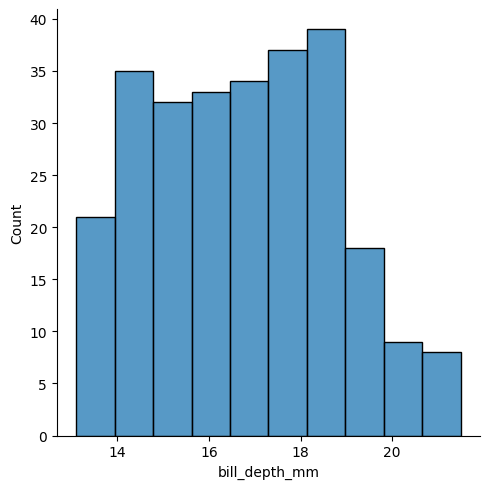

In [7]:
import seaborn as sns
sns.displot(df['bill_depth_mm'])

In [8]:
df['bill_depth_mm']=df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())

In [9]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64

In [10]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
df['species'] = lbl_enc.fit_transform(df['species'])
df['island'] = lbl_enc.fit_transform(df['island'])

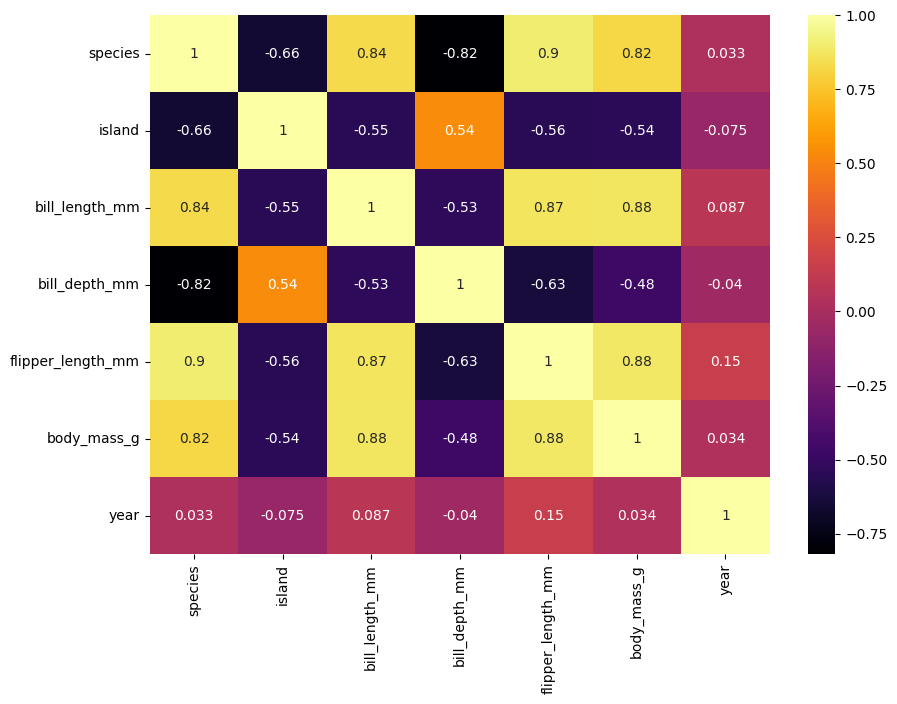

In [14]:
#correlation analysis
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

In [15]:
#feature selection
from sklearn.model_selection import train_test_split
X=df.drop(['species','island','body_mass_g','year'],axis=1)
y=df['species']

In [16]:
#datanormalization
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [17]:
#train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", round(accuracy*100,2),"%")
prec = precision_score(y_test, predictions)
print("Precision:", round(prec*100,2),"%")
recall = recall_score(y_test, predictions)
print("Recall:", round(recall*100,2),"%")
print(classification_report(y_test, predictions))

Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        35

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83

